### 이미지 수집
이미지를 직접 수집해서 데이터셋을 빌드한다.

### cv2.stylization
영화 장면의 이미지를 수집해서 스케치한 효과가 날 수 있게 opencv를 활용한다.

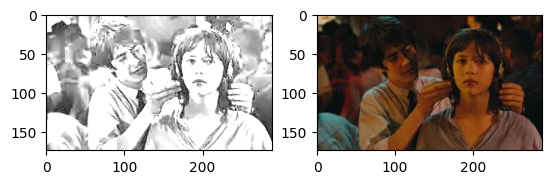

In [121]:
import os
import cv2
import time
import shutil
import requests
import matplotlib.pyplot as plt
from selenium import webdriver
from urllib.parse import quote
from urllib.request import urlretrieve
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

def pencil_sketch(img):
    img = cv2.fastNlMeansDenoisingColored(img)  # 디노이징
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # BGR -> GRAY
    blr = cv2.GaussianBlur(gray, (0, 0), 23)  # 가우시안 필터
    dst = cv2.divide(gray, blr, scale=255)
    return dst

img = cv2.imread("./1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
new_img = pencil_sketch(img)
new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.subplot(1, 2, 1)
plt.imshow(new_img)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.show()

### Image URL 수집
selenium으로 url을수집한다.

In [46]:
# driver 옵션 정의
options = webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_argument('--disable-gpu')
# options.add_argument("headless")
options.add_experimental_option('excludeSwitches', ['enable-logging'])
options.add_experimental_option('excludeSwitches', ['enable-automation'])
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                      AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36")

In [47]:
# 스크롤 다운 함수 정의
def scroll_down(body):
    for _ in range(1, 4):
        body.send_keys(Keys.PAGE_DOWN)
        body.send_keys(Keys.PAGE_DOWN)

In [53]:
driver = webdriver.Chrome(options = options)
url = "https://search.naver.com/search.naver?ssc=tab.image.all&where=image&sm=tab_jum&query=%EC%98%81%ED%99%94+%EC%9E%A5%EB%A9%B4"
driver.get(url)
main = driver.find_element(By.CLASS_NAME, "wrap-new.api_animation.tabsch.tabsch_image")
time.sleep(2)

for _ in range(5):
    scroll_down(main)
    
body = driver.find_element(By.CLASS_NAME, "image_tile._fe_image_tab_grid")
imgs = body.find_elements(By.TAG_NAME, "img")
src_list = []
for img in imgs:
    src = img.get_attribute("src")
    if src.startswith("https:"):
        src_list.append(src)
driver.close()

In [54]:
src_list_copy = [i for i in src_list if i != None]

In [55]:
src_list_copy, len(src_list_copy)

(['https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA1MDhfMTE5%2FMDAxNjUxOTk4NjkzOTE3.9mWWqUr1ne9rm9JDhx3mIorZ7WB7a11UvHqZZnILTg0g.3jmWMekAW-fJfGKlviGQvSOPJ4F8t-XyzMxq9Qerg1wg.JPEG.ddongu1234%2F8169b5e538a2f3c85a18e4c03f3446b8.jpg&type=a340',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxOTA3MjBfNTUg%2FMDAxNTYzNjA2NDg0MzAx.foRUrOfovGNW6hZgeKVZbBpw5pCAuhQtlDqU89qJU-4g.VOwwgPj-qq6TewF7ZjQRYhXBtsinQP13o1PoG-X_UKcg.JPEG.heyoum0610%2Fhw__0552_%25BA%25B9%25BB%25E7.jpg&type=a340',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODA5MjNfNTcg%2FMDAxNTM3Njc0MzAyNDkz.P4bVOmQAjJ2lhwZ3IVj9V9r9VUNt6Q3ECmec-H1BpPEg.g-JhdVaRwt--uUrfizEEGtbMlwUCi4yRkvwSZPr2Mngg.JPEG.ondisplay%2F2018-04-13-at-23-15-22.jpg&type=a340',
  'https://search.pstatic.net/sunny/?src=https%3A%2F%2Fthumbs.gfycat.com%2FEducatedFrigidCurassow-size_restricted.gif&type=a340',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfil

### Download Image
수집한 image src로 이미지를 다운로드한다.

In [58]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                           AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}
for idx, src in enumerate(src_list):
    try:
        urlretrieve(src, f"./images/scene_{idx}.jpeg")
    except:
        req = requests.get(src, headers = headers)
        with open(f"./images/{i}_{label_dict[idx+1]}.jpeg", "wb") as file:
            file.write(req.content)

테스트로 사용하기 위해 소량 분할

In [ ]:
image_dir = "./images"
img_filenames = os.listdir(image_dir)

move_dir = "./test_images/origin"
if not os.path.isdir(move_dir):
    os.mkdir(move_dir)

for filename in img_filenames[:25]:
    shutil.move(os.path.join(image_dir, filename), os.path.join(move_dir, filename))

### image filter 적용 후 저장
이미지에 필터를 적용하고 다시 저장한다.

In [141]:
origin_images = os.listdir(move_dir)
new_path = "./test_images/applied"
if not os.path.isdir(new_path):
    os.mkdir(new_path)

for filename in img_filenames[52:62]:
    img = cv2.imread(os.path.join(image_dir, filename))
    new_img = pencil_sketch(img)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2BGR)
    cv2.imwrite(os.path.join("./valid", filename), new_img)

### 전후 비교 시각화

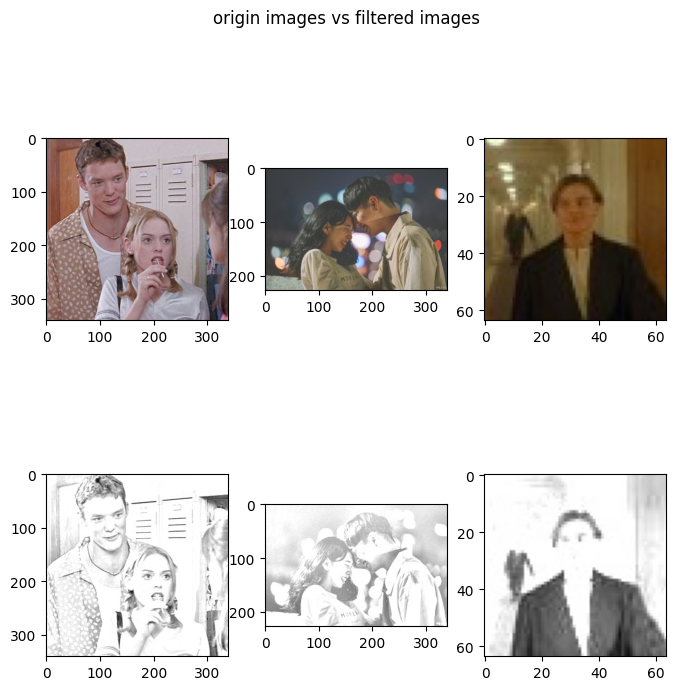

In [101]:
new_images = os.listdir(new_path)
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize=(8, 8))

for i in range(3):
    img = cv2.imread(os.path.join(move_dir, origin_images[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(os.path.join(new_path, new_images[i]))
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    axis[0][i].imshow(img)
    axis[1][i].imshow(img2)

plt.suptitle("origin images vs filtered images")
plt.show()

### 이미지에 대한 스크립트 작성
image에 대한 스크립트와 함께 차후 csv파일로 구성하기 위해서 dict형태로 데이터를 생성한다

단, low resolution 혹은 스크립트의 내용을 적기 난해한 이미지의 경우 제외한다.

In [105]:
low_resolution = [
    'scene_10.jpeg', 
    'scene_11.jpeg', 
    'scene_104.jpeg', 
    'scene_105.jpeg', 
    'scene_106.jpeg', 
    'scene_111.jpeg', 
    'scene_114.jpeg', 
    'scene_115.jpeg',
    'scene_117.jpeg',
    'scene_120.jpeg',
]

data = {
    "file_name" : [os.path.join(new_path, i).replace("\\", "/") for i in os.listdir(new_path) if i not in low_resolution],
    "text" : [
        'A storyboard with "Three friends are in conversation. Two are women and one is eating candy. The man is laughing."',
        'A storyboard with "Two beloved men and women smile and face each other\'s foreheads."',
        'A storyboard with "Four people are smiling brightly as they stare straight ahead. The two are eating with soup."',
        'A storyboard with "Man and woman are walking together. The woman is holding a flowerpot, and the man is holding a basket."',
        'A storyboard with "Man and woman are resting on the grass. The man is lying down and the woman is sitting. They are staring lovingly at each other."',
        'A storyboard with "A doll bleeding from her eyes is laughing in a bizarre manner."',
        'A storyboard with "A woman seems to have a lot of thoughts, and is submerged with only her face on the surface."',
        'A storyboard with "A woman is sitting in the car. She looks out the window and seems to organize her complicated thoughts."',
        'A storyboard with "A man has a vengeful look on his face and points a gun at his opponent."',
        'A storyboard with "A man and a woman are seen. The woman looks at the man lovingly, but the man is looking at the floor as if his heart has departed."',
        'A storyboard with "I see a monster whose mouth is greatly torn. The teeth are sharp, the eyes are unusually large, and muscular."',
        'A storyboard with "Men and women are making love to each other. Close their eyes and kiss each other."',
        'A storyboard with "A boy and a man are together in the car. The man is wearing glasses. They are smiling at something together."',
        'A storyboard with "A man is jumping on top of a speeding car. In the back, there is a man watching him jump."',
        'A storyboard with "A man in glasses is sitting in a hospital room. As if talking to someone, he is looking straight ahead and opening his mouth."',
    ]
}


데이터 프레임으로 구성한다.

In [135]:
df = pd.DataFrame(data)
df["file_name"] = df["file_name"].apply(lambda x : x.replace(x[:x.rfind("/") + 1], ""))
df

,file_name,text
0,scene_0.jpeg,"A storyboard with ""Three friends are in conver..."
1,scene_1.jpeg,"A storyboard with ""Two beloved men and women s..."
2,scene_100.jpeg,"A storyboard with ""Four people are smiling bri..."
3,scene_101.jpeg,"A storyboard with ""Man and woman are walking t..."
4,scene_102.jpeg,"A storyboard with ""Man and woman are resting o..."
5,scene_103.jpeg,"A storyboard with ""A doll bleeding from her ey..."
6,scene_107.jpeg,"A storyboard with ""A woman seems to have a lot..."
7,scene_108.jpeg,"A storyboard with ""A woman is sitting in the c..."
8,scene_109.jpeg,"A storyboard with ""A man has a vengeful look o..."
9,scene_110.jpeg,"A storyboard with ""A man and a woman are seen...."


In [136]:
df.to_csv("./test_images/applied/metadata.csv", sep=",", encoding="utf8", index=False)

In [114]:
# 걸러진 이미지들은 삭제한다.
for file in low_resolution:
    os.remove(os.path.join(new_path, file))

### Set Dataset
huggingface의 모델로 훈련할 수 있는 형태로 데이터셋을 구축해보자.

In [144]:
from huggingface_hub import notebook_login

notebook_login()

In [146]:
from datasets import load_dataset

dataset = load_dataset("HeonWoo22/my_dataset", data_dir=r'C:\Users\admin\.jupyter\TTI\test_images\applied\storyboards', split='train')
dataset

EmptyDatasetError: The directory at hf://datasets/HeonWoo22/my_dataset@6cea6d05057a8af8d81ceec8163546081f51dede/C:\Users\admin\.jupyter\TTI\test_images\applied\storyboards doesn't contain any data files

### Training Script
훈련시키는 스크립트를 구성해보자. 그 전에, 훈련 스크립트를 좀 더 빠르고 원활하게 만들어주는 accelerate부터 설정한다.

### Accelerate
사실 가장 핵심이 되는 기능으로는 TPU, 혹은 다중 GPU설정으로 보이는데 두 환경 모두 해당되지 않기에, 단일 GPU설정법만 정리한다.

```
which compute environment are you running? - 1
This machine
Which type of machine are you using? - 2
No distributed training
Do you want to run your training on CPU only (even if a GPU / Apple Silicon / Ascend NPU device is available)? [yes/NO]:NO - 3
Do you wish to optimize your script with torch dynamo?[yes/NO]:NO - 4
Do you want to use DeepSpeed? [yes/NO]: NO - 5
What GPU(s) (by id) should be used for training on this machine as a comma-seperated list? [all]:0 - 6
```
1. 어떤 환경에서 실행하는지를 묻는다. AWS혹은 local 중 2지선다의 형태인데 AWS환경이 아니기에 `This machine` 선택
2. TPU, 멀티 CPU, 멀티 GPU, 분할 없음 정도로 나오는데 그 어느 곳에도 해당되지 않기에 `No distrivuted training` 선택
3. GPU가 있어도 CPU에서만 돌리겠냐는 선택지. cuda 설정이 되어 있기에 `NO`입력
4. `torch dynamo`를 이용해서 스크립트를 최적화 하겠냐는 선택지. 사용해본적도 없고 괜한 충돌을 일으킬 바엔.. 이라는 생각으로 `NO`선택
5. `Deep Speed`를 사용하겠냐는 선택지. 분산 학습을 위한 라이브러리이기에 `NO`입력
6. 콤마로 구분된 GPU들 중 몇 번을 사용하겠냐는 선택지. GPU는 하나밖에 없기에 `0`입력

### Script
```
$env:MODEL_NAME="runwayml/stable-diffusion-v1-5"

accelerate launch train_text_to_image.py --pretrained_model_name_or_path=$env:MODEL_NAME --dataset_name='C:\Users\admin\.jupyter\TTI\test_images\applied' --resolution=512 --center_crop --random_flip --train_batch_size=1 --gradient_accumulation_steps=4 --gradient_checkpointing --max_train_steps=1000 --learning_rate=1e-05 --max_grad_norm=1 --lr_scheduler="constant" --lr_warmup_steps=0 --output_dir="./first_training" --mixed_precision="fp16"
```

- `$env:MODEL_NAME` : Linux의 export명령어와 동일한 역할을 하며, powershell 환경에 MODEL_NAME이란 변수 이름을 추가하는 정도로 생각하면 좋겠다.
- `--resolution` : input image의 resolution을 의미한다. 512로 설정했기에 512, 512의 이미지로 들어간다.
- `--random_flip` : 이미지를 random하게 horizontal flip한다.
- `--center_crop` : 입력된 이미지를 해상도를 기준으로 중앙을 잘라낼지에 대한 여부. 설정하지 않으면 이미지가 무작위로 잘린다.
- `--max_train_steps` : epochs와 동일

### Inference
훈련시킨 text-to-image 모델을 사용해보자.

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("path/to/saved_model", torch_dtype=torch.float16, use_safetensors=True).to("cuda")

image = pipeline(prompt="yoda").images[0]
# image.save("yoda-pokemon.png")
image